In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv('NG_22dec.csv')

C:\Users\Bhawit Balodi\AppData\Local\Temp\ipykernel_10688\2437384017.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('NG_22dec.csv')


In [3]:
df.head(5)

,Time/sec,Potential/V,Current/A,Charge/C
0,0.5,3.94214,1.24797,0.00000
1,1.0,3.94504,1.24789,0.81737
2,2.0,3.94806,1.24790,2.16510
3,3.0,3.95068,1.24790,3.33812
4,4.0,3.95281,1.24790,4.67338


In [4]:
df.isnull().sum()

Time/sec       0
Potential/V    0
Current/A      0
Charge/C       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048571 entries, 0 to 1048570
Data columns (total 4 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Time/sec     1048571 non-null  object 
 1   Potential/V  1048571 non-null  float64
 2   Current/A    1048571 non-null  float64
 3   Charge/C     1048571 non-null  float64
dtypes: float64(3), object(1)
memory usage: 32.0+ MB


In [6]:
df.shape

(1048571, 4)

In [7]:
df.loc[df['Time/sec']=='######.#']  # checking for the string values 

,Time/sec,Potential/V,Current/A,Charge/C
994879,######.#,4.17935,0.00000,2964.880
994880,######.#,4.17936,0.00000,2964.880
994881,######.#,4.17934,0.00000,2964.880
994882,######.#,4.17935,0.00000,2964.880
994883,######.#,4.17934,0.00000,2964.880
...,...,...,...,...
1048566,######.#,3.99802,1.24720,-335.933
1048567,######.#,3.99817,1.24720,-334.761
1048568,######.#,3.99830,1.24719,-333.588
1048569,######.#,3.99844,1.24719,-332.242


In [8]:
df.rename(columns={'Time/sec': 'Time', 'Potential/V': 'Potential','Current/A': 'Current','Charge/C': 'Charge'}, inplace=True)

In [9]:
df.drop(df.index[994879:1048571],axis = 0, inplace = True)   # Removing the #### values 

In [10]:
# df.drop(['Time'], axis=1,inplace=True)  # deleting the Time column

In [11]:
# df['Time'].iloc[994881]

In [12]:
df.shape

(994879, 4)

In [13]:
df.insert(loc=3, column='Capacity', value = df['Charge']/3600)  # Adding the column

In [14]:
df['Time'] = df['Time'].astype(float)  # converting object values to float values

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994879 entries, 0 to 994878
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Time       994879 non-null  float64
 1   Potential  994879 non-null  float64
 2   Current    994879 non-null  float64
 3   Capacity   994879 non-null  float64
 4   Charge     994879 non-null  float64
dtypes: float64(5)
memory usage: 38.0 MB


Text(0.5, 1.0, 'Capacity vs TIme')

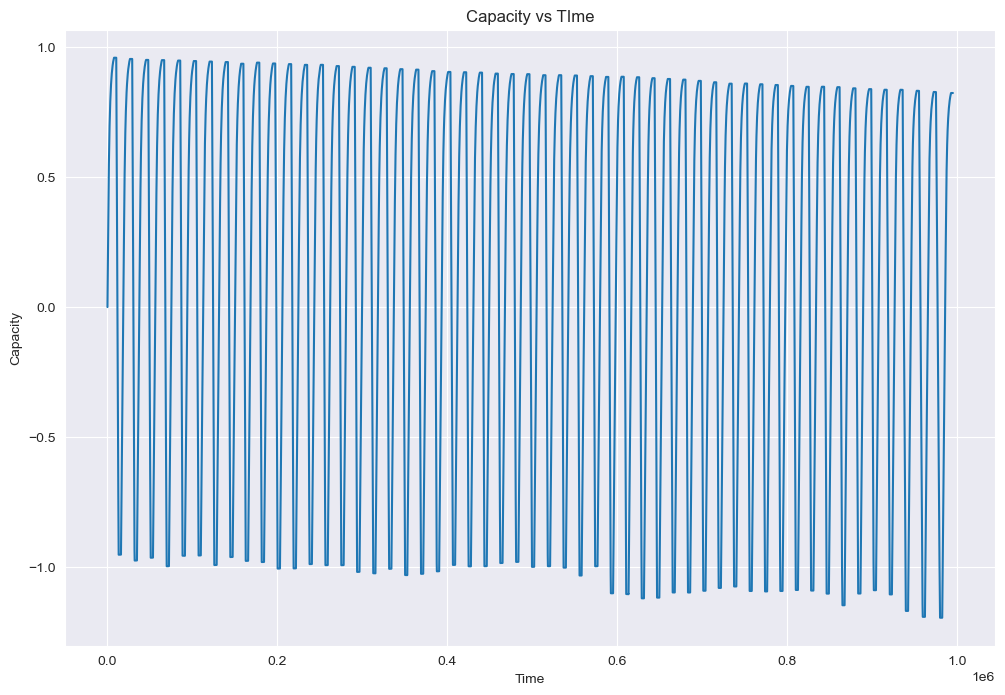

In [16]:
# Capacity Vs Time
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
plt.plot(df['Capacity'])
plt.ylabel('Capacity')
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('Time')
plt.title('Capacity vs TIme')

# Data Cleaning

In [17]:
# df.fillna(value=0, inplace=True)

In [18]:
# df.isnull().sum()

In [19]:
# df.info()

# Local Maxima and Minima

CPU times: total: 6min 40s
Wall time: 10min 20s


C:\Users\Bhawit Balodi\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:755: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  return ax.plot(*args, **kwds)
C:\Users\Bhawit Balodi\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:755: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  return ax.plot(*args, **kwds)


Text(0.5, 1.0, 'Local Maxima and Local Minima')

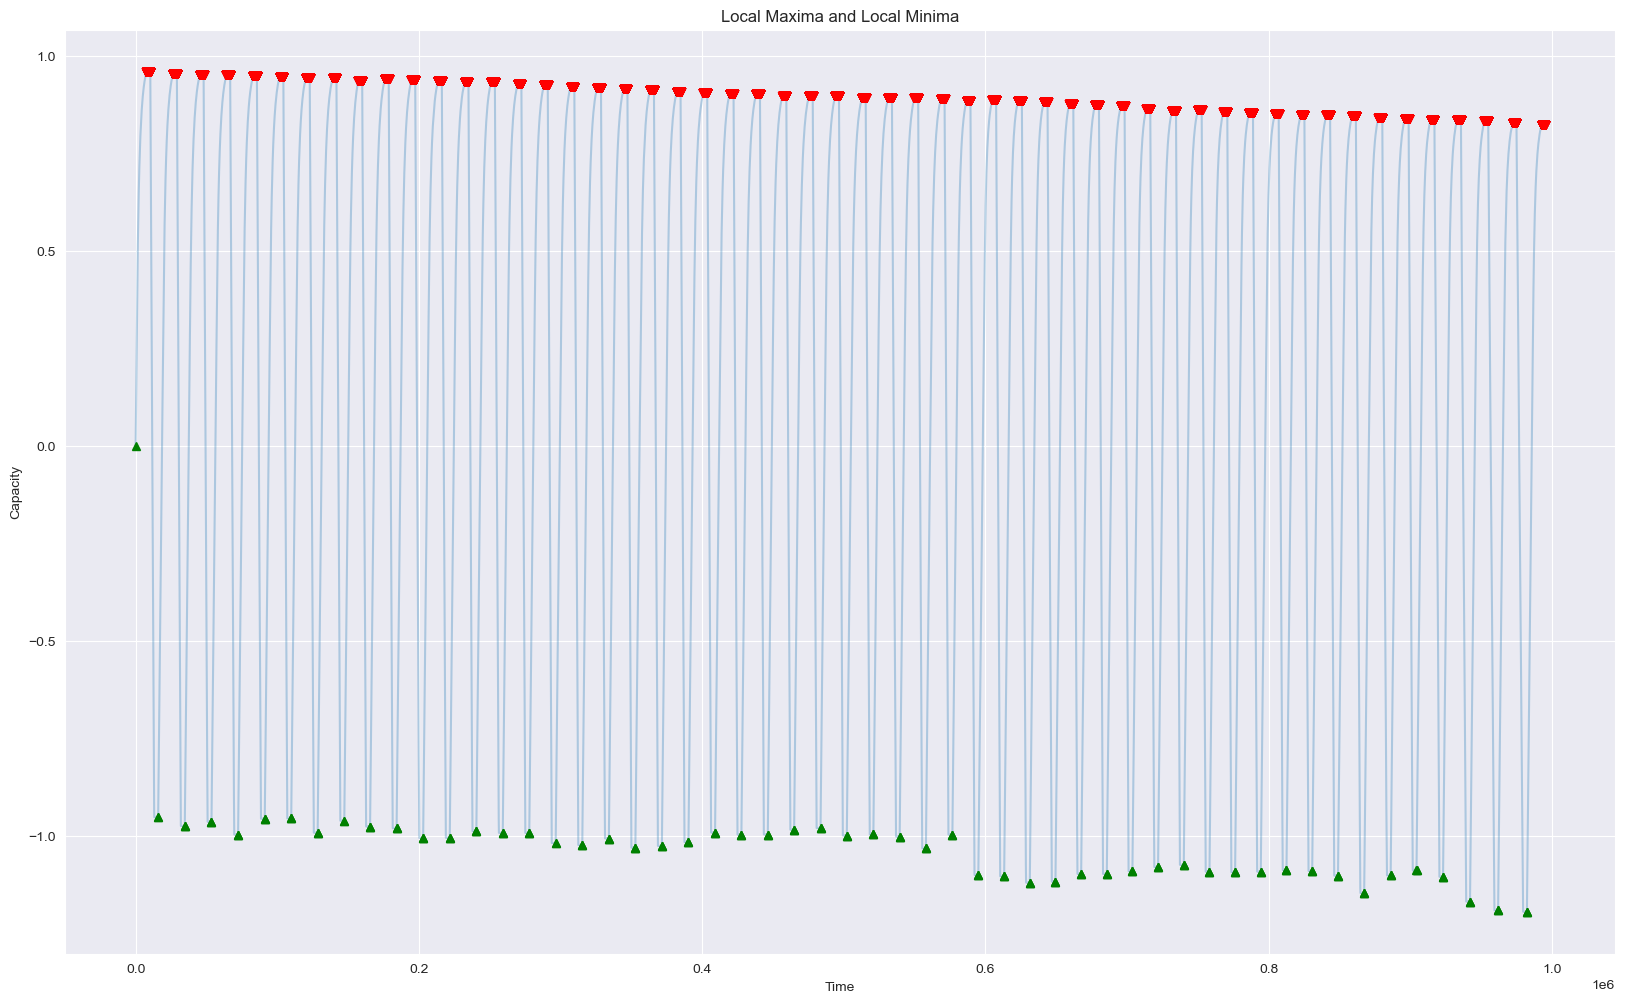

In [20]:
%%time
from scipy.signal import argrelextrema
import numpy as np

ilocs_min = argrelextrema(df.Capacity.values, np.less_equal, order=5000)[0]
ilocs_max = argrelextrema(df.Capacity.values, np.greater_equal, order=5000)[0]

df.Capacity.plot(figsize=(20,12), alpha=.3)
# filter prices that are peaks and plot them differently to be visable on the plot
df.iloc[ilocs_max].Capacity.plot(style='.', lw=1, color='red', marker="v");
df.iloc[ilocs_min].Capacity.plot(style='.', lw=1, color='green', marker="^")
plt.ylabel("Capacity")
plt.xlabel("Time")
plt.title('Local Maxima and Local Minima')

In [21]:
maximum_point = df['Capacity'][ilocs_max].unique()
minimum_point = df['Capacity'][ilocs_min].unique()

In [22]:
print(maximum_point)
print(maximum_point.max())
print(minimum_point)

[0.95931944 0.95455    0.95088889 0.95006389 0.94838889 0.94654722
 0.94444722 0.94270278 0.93617778 0.940475   0.93714722 0.93475278
 0.93185278 0.93199444 0.92716944 0.92424722 0.92075278 0.91866944
 0.91525    0.91343333 0.90770833 0.90459167 0.90346111 0.90203333
 0.89824167 0.896575   0.89607222 0.89202222 0.89213611 0.89085556
 0.88832778 0.88545556 0.88612778 0.8842     0.88057778 0.87751389
 0.87505278 0.87025556 0.8649     0.85945    0.85999167 0.85715833
 0.85434444 0.85090833 0.84737222 0.84766667 0.84604444 0.84154444
 0.83846389 0.83609722 0.83606667 0.83217778 0.82765556 0.82357778]
0.9593194444444445
[ 0.         -0.95302222 -0.97546389 -0.96463333 -0.99741667 -0.95675833
 -0.95597778 -0.99267778 -0.96201111 -0.97678611 -0.98126111 -1.00638611
 -1.00568333 -0.989225   -0.99324167 -0.99336111 -1.01925278 -1.024275
 -1.00729444 -1.03115278 -1.02656667 -1.01694444 -0.99236667 -0.99746111
 -0.99722778 -0.98508056 -0.98075833 -0.99984722 -0.99675556 -1.00235556
 -1.03265833 -

In [23]:
# df.insert(loc = 4,column ='Energy',value=df['Capacity']*df["Potential"]) # do add if needed 

In [24]:
# df.insert(loc = 5,column ='Power',value=df['Current']*df["Potential"])

In [20]:
df.insert(loc=4,column='SOC',value = df['Capacity']/0.96)

In [21]:
df.head(20)

,Time,Potential,Current,Capacity,SOC,Charge
0,0.5,3.94214,1.24797,0.000000,0.000000,0.00000
1,1.0,3.94504,1.24789,0.000227,0.000237,0.81737
2,2.0,3.94806,1.24790,0.000601,0.000626,2.16510
3,3.0,3.95068,1.24790,0.000927,0.000966,3.33812
4,4.0,3.95281,1.24790,0.001298,0.001352,4.67338
5,5.0,3.95467,1.24789,0.001624,0.001692,5.84639
6,6.0,3.95637,1.24791,0.001995,0.002078,7.18165
7,7.0,3.95793,1.24789,0.002321,0.002417,8.35467
8,8.0,3.95938,1.24790,0.002692,0.002804,9.68992
9,9.0,3.96077,1.24789,0.003017,0.003143,10.86290


Text(0.5, 1.0, 'Capacity vs TIme')

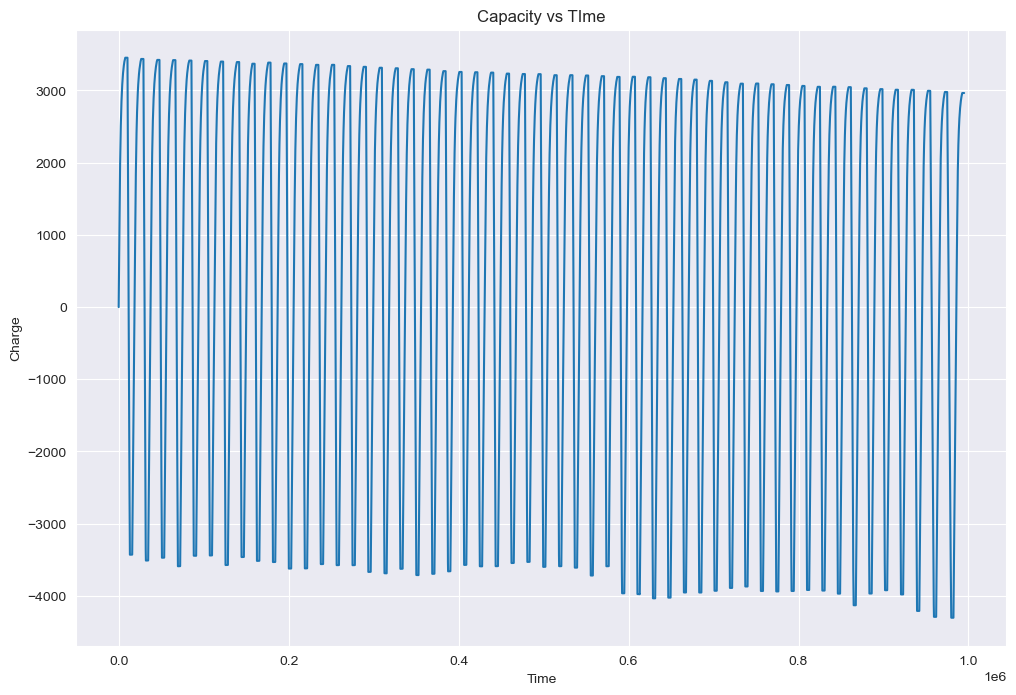

In [22]:
# Capacity Vs Time
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
plt.plot(df['Charge'])
plt.ylabel('Charge')
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('Time')
plt.title('Capacity vs TIme')

# Integral current

In [23]:
from scipy.integrate import cumulative_trapezoid

p = df["Time"][:df.shape[0]]
q = df["Current"][:df.shape[0]]

integral = (cumulative_trapezoid(q,p,initial=0))/(3600*0.96)

df.loc[:, "Integral_current"] = integral

Text(0.5, 1.0, 'Dataset')

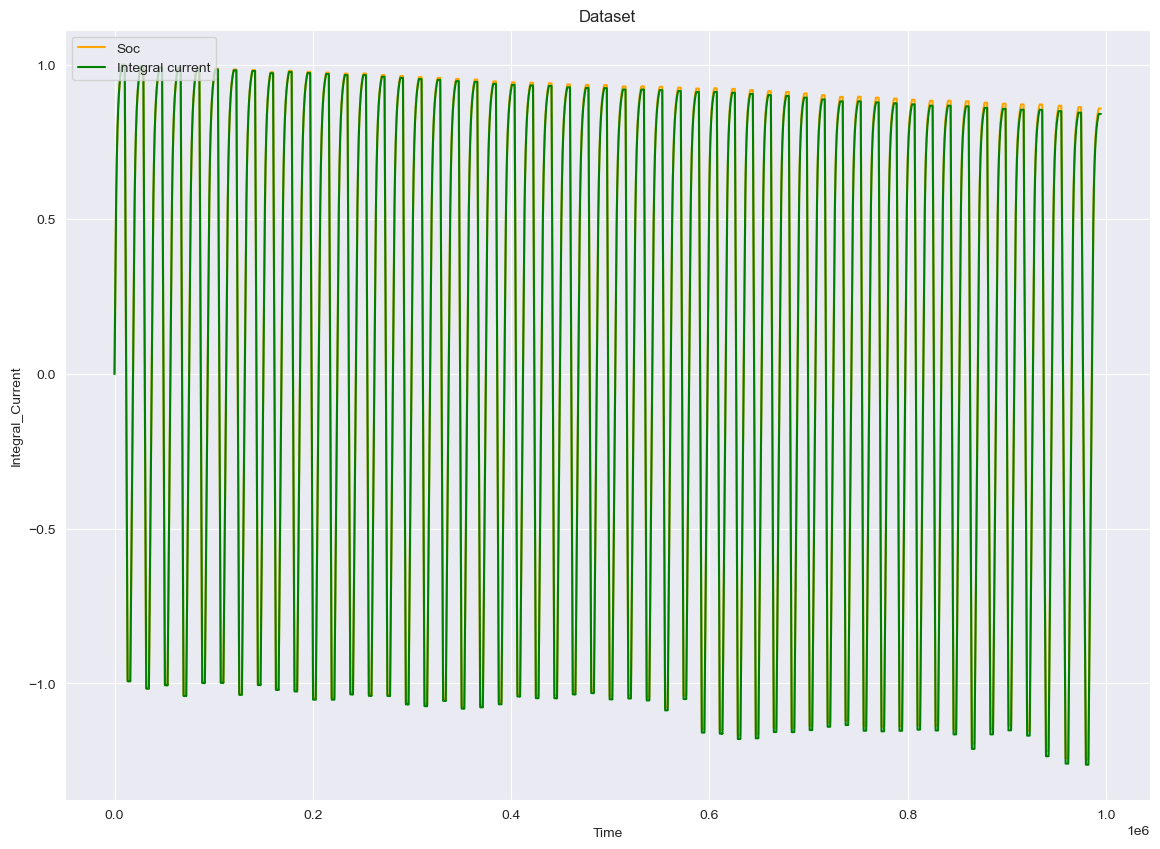

In [24]:
sns.set_style("darkgrid")
plt.figure(figsize=(14, 10))
plt.plot(df['SOC'],color='orange')
plt.plot(df['Integral_current'],color='green')
plt.ylabel('Integral_Current')
plt.xlabel('Time')
plt.legend(["Soc", "Integral current"], loc ="upper left")
plt.title('Dataset')

In [25]:
df.isnull().sum()

Time                0
Potential           0
Current             0
Capacity            0
SOC                 0
Charge              0
Integral_current    0
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994879 entries, 0 to 994878
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Time              994879 non-null  float64
 1   Potential         994879 non-null  float64
 2   Current           994879 non-null  float64
 3   Capacity          994879 non-null  float64
 4   SOC               994879 non-null  float64
 5   Charge            994879 non-null  float64
 6   Integral_current  994879 non-null  float64
dtypes: float64(7)
memory usage: 53.1 MB


In [27]:
df.describe()

,Time,Potential,Current,Capacity,SOC,Charge,Integral_current
count,994879.000000,994879.000000,994879.000000,994879.000000,994879.000000,994879.000000,994879.000000
mean,501042.738163,3.886127,0.002878,0.146517,0.152622,527.461697,0.142881
std,288767.217690,0.382038,1.142440,0.752569,0.783926,2709.247496,0.784457
min,0.500000,2.750290,-2.503150,-1.195086,-1.244881,-4302.310000,-1.262688
25%,250933.600000,3.475400,0.000000,-0.602635,-0.627745,-2169.485000,-0.637721
50%,501905.600000,4.147310,0.072232,0.455186,0.474152,1638.670000,0.464311
75%,751231.300000,4.199370,0.795196,0.839904,0.874900,3023.655000,0.862360
max,999999.600000,4.199950,1.364510,0.959319,0.999291,3453.550000,0.999371


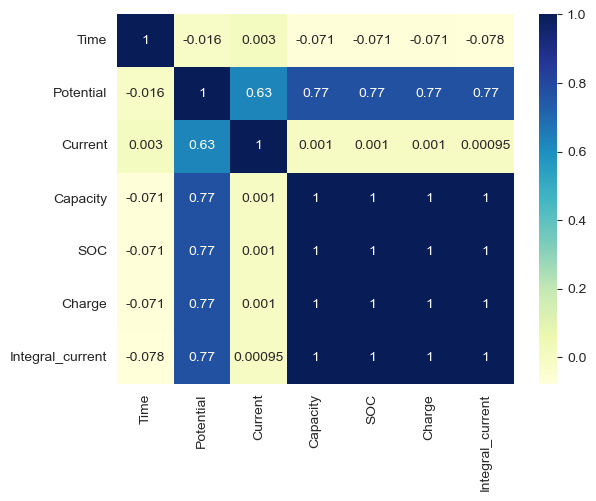

<Figure size 1400x1000 with 0 Axes>

In [28]:
import seaborn as sn
dataplot = sn.heatmap(df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.figure(figsize = (14,10))
plt.show()

# Modeling

In [29]:
time = df.pop('Time')

In [30]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

numericals = ['Potential','Current','Capacity','Charge','Integral_current'] # Not Normalizing the Y(target Variable) - which is SOC
df[numericals] = scaler.fit_transform(df[numericals])

In [31]:
df.head()

,Potential,Current,Capacity,SOC,Charge,Integral_current
0,0.822158,0.969868,0.554717,0.000000,0.554717,0.558203
1,0.824159,0.969847,0.554823,0.000237,0.554823,0.558283
2,0.826242,0.969850,0.554996,0.000626,0.554996,0.558443
3,0.828049,0.969850,0.555148,0.000966,0.555148,0.558602
4,0.829519,0.969850,0.555320,0.001352,0.555320,0.558762


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994879 entries, 0 to 994878
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Potential         994879 non-null  float64
 1   Current           994879 non-null  float64
 2   Capacity          994879 non-null  float64
 3   SOC               994879 non-null  float64
 4   Charge            994879 non-null  float64
 5   Integral_current  994879 non-null  float64
dtypes: float64(6)
memory usage: 45.5 MB


In [33]:
Y = df.pop('SOC')
X = df

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)

In [35]:
X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((795903, 5), (198976, 5), (795903,), (198976,))

In [36]:
X_train.head()

,Potential,Current,Capacity,Charge,Integral_current
287978,0.999607,0.661597,0.981726,0.981726,0.979250
257556,0.493633,0.647200,0.093862,0.093862,0.098466
651058,0.739704,0.969866,0.298265,0.298265,0.298040
671282,0.924279,0.969785,0.641038,0.641038,0.637943
542124,0.883338,0.969842,0.522010,0.522010,0.521002


In [37]:
Y_train.head()

287978    0.958281
257556   -1.034239
651058   -0.575524
671282    0.193718
542124   -0.073401
Name: SOC, dtype: float64

In [38]:
def plot_his(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

In [39]:
# # https://stackoverflow.com/questions/44475682/cross-validation-in-deep-neural-networks

# from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
# kf =KFold(n_splits=5, shuffle=True, random_state=42)

# cnt = 1
# # split()  method generate indices to split data into training and test set.
# for train_index, test_index in kf.split(X, Y):
#     print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
#     cnt += 1

In [40]:
from tensorflow.keras.callbacks import EarlyStopping

In [41]:
callback = EarlyStopping(
    monitor = 'val_loss' ,
    min_delta = 0.00001,
    patience = 15,
    verbose = 1,
    mode = 'auto',
    baseline = None,
    restore_best_weights = False
)

In [42]:
X_train.head()

,Potential,Current,Capacity,Charge,Integral_current
287978,0.999607,0.661597,0.981726,0.981726,0.979250
257556,0.493633,0.647200,0.093862,0.093862,0.098466
651058,0.739704,0.969866,0.298265,0.298265,0.298040
671282,0.924279,0.969785,0.641038,0.641038,0.637943
542124,0.883338,0.969842,0.522010,0.522010,0.521002


# Function for the AIC (Akaike information cirteria)

In [43]:
#  Function for the AIC 

import tensorflow as tf
from scipy.stats import norm

# Train your model using TensorFlow
def AIC_value(model,Y_pred,Y_test):

    Y_test = np.asarray(Y_test).astype('float32').reshape((-1,1))
    Y_pred_1 = np.asarray(Y_pred).astype('float32').reshape((-1,1))


    # Calculate the negative log-likelihood of the model's parameters based on the training data
    nll = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=Y_test, logits=Y_pred_1))

    # Calculate the number of parameters in the model
    num_params = model.count_params()

    # Calculate the AIC value for the model
    aic = 2 * num_params - 2 * nll

    # Print the AIC value
    print("AIC: ", aic.numpy())

In [44]:
%%time
import tensorflow as tf
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([tf.keras.layers.Dense(70,activation = 'linear'),
                               tf.keras.layers.Dense(50, activation = 'relu'),
                               tf.keras.layers.Dense(20),
                               tf.keras.layers.Dense(1)])

model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_1 = model_1.fit(X_train,Y_train, epochs= 100,batch_size=128,validation_data=(X_test,Y_test), callbacks = callback)

Epoch 1/100
1870/6218 [========>.....................] - ETA: 7s - loss: 0.0209 - rmse: 0.0797 - mae: 0.0209 - mse: 0.0064 - mape: 117.9122

KeyboardInterrupt: 

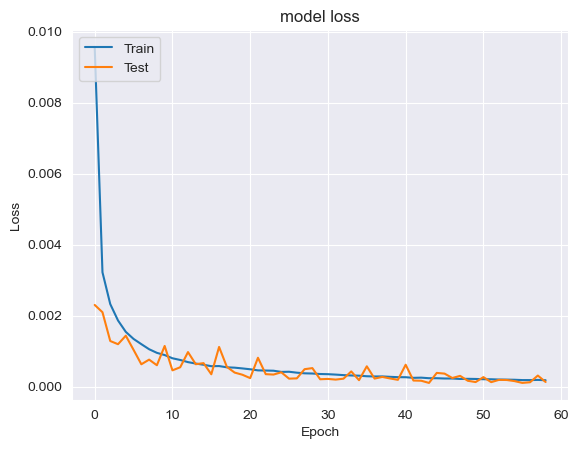

In [50]:
plot_his(history_1)

In [51]:
model_1.evaluate(X_test,Y_test)

6218/6218 [==============================] - 15s 2ms/step - loss: 1.3312e-04 - rmse: 2.5488e-04 - mae: 1.3312e-04 - mse: 6.4962e-08 - mape: 0.0772


[0.0001331187813775614,
 0.0002548769989516586,
 0.0001331187813775614,
 6.496227911156893e-08,
 0.07717721909284592]

In [52]:
Y_pred_1 = model_1.predict(X_test)

6218/6218 [==============================] - 11s 2ms/step


In [53]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 70)                420       
                                                                 
 dense_1 (Dense)             (None, 50)                3550      
                                                                 
 dense_2 (Dense)             (None, 20)                1020      
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 5,011
Trainable params: 5,011
Non-trainable params: 0
_________________________________________________________________


In [54]:
AIC_value(model_1,Y_pred_1,Y_test)

AIC:  10021.581


In [55]:
# # AIC 1

# import tensorflow as tf
# from scipy.stats import norm

# # Train your model using TensorFlow
# model = model_1

# Y_test = np.asarray(Y_test).astype('float32').reshape((-1,1))
# Y_pred_1 = np.asarray(Y_pred_1).astype('float32').reshape((-1,1))


# # Calculate the negative log-likelihood of the model's parameters based on the training data
# nll = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=Y_test, logits=Y_pred_1))

# # Calculate the number of parameters in the model
# num_params = model_1.count_params()

# # Calculate the AIC value for the model
# aic = 2 * num_params - 2 * nll

# # Print the AIC value
# print("AIC: ", aic.numpy())

In [56]:
# # AIC 2
# # Get the model's maximum likelihood estimate of the parameters
# params = model_1.get_weights()[0]

# # Calculate the negative log-likelihood of the model's parameters based on the training data
# nll = -np.sum(Y_train * np.log(model_1.predict(X_train)) + (1 - Y_train) * np.log(1 - model_1.predict(X_train)))

# # Calculate the number of parameters in the model
# num_params = len(params)

# # Calculate the AIC value for the model
# aic = 2 * num_params - 2 * nll

# # Print the AIC value
# print("AIC: ", aic)





'''
Showing the error : MemoryError: Unable to allocate 4.61 TiB for an array with shape (795903, 795903) and data type float64
'''

'\nShowing the error : MemoryError: Unable to allocate 4.61 TiB for an array with shape (795903, 795903) and data type float64\n'

# Function for the BIC (Baysian information criteria)

In [57]:
# # BIC
# log_likelihood = np.sum(np.log(Y_pred_1) * Y_test)

# # Calculate the BIC
# n = len(X_test)
# k = model_1.count_params()
# bic = -2 * log_likelihood + k * np.log(n)
# print(bic)

# Model 2

In [58]:
%%time
import tensorflow as tf
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(50),
                               tf.keras.layers.Dense(1)])

model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_2 = model_2.fit(X_train,Y_train, epochs= 100,validation_data=(X_test,Y_test), callbacks = callback)

Epoch 1/100
24872/24872 [==============================] - 79s 3ms/step - loss: 0.0026 - rmse: 0.0179 - mae: 0.0026 - mse: 3.2143e-04 - mape: 11.2636 - val_loss: 3.2837e-04 - val_rmse: 4.0898e-04 - val_mae: 3.2837e-04 - val_mse: 1.6726e-07 - val_mape: 0.2486
Epoch 2/100
24872/24872 [==============================] - 76s 3ms/step - loss: 3.9906e-04 - rmse: 5.3409e-04 - mae: 3.9906e-04 - mse: 2.8525e-07 - mape: 2.7639 - val_loss: 3.9218e-04 - val_rmse: 4.0731e-04 - val_mae: 3.9218e-04 - val_mse: 1.6590e-07 - val_mape: 0.2780
Epoch 3/100
24872/24872 [==============================] - 77s 3ms/step - loss: 2.7841e-04 - rmse: 3.6849e-04 - mae: 2.7841e-04 - mse: 1.3578e-07 - mape: 1.0702 - val_loss: 5.6210e-04 - val_rmse: 5.8689e-04 - val_mae: 5.6210e-04 - val_mse: 3.4443e-07 - val_mape: 0.4020
Epoch 4/100
24872/24872 [==============================] - 79s 3ms/step - loss: 2.0605e-04 - rmse: 2.6935e-04 - mae: 2.0605e-04 - mse: 7.2550e-08 - mape: 0.3282 - val_loss: 7.5801e-05 - val_rmse: 8.273

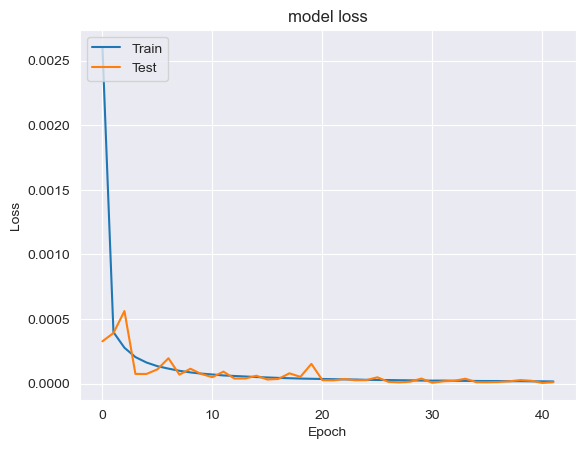

In [59]:
plot_his(history_2)

In [60]:
model_2.evaluate(X_test,Y_test)

6218/6218 [==============================] - 15s 2ms/step - loss: 1.1813e-05 - rmse: 1.3431e-05 - mae: 1.1813e-05 - mse: 1.8040e-10 - mape: 0.0058


[1.1812943739641923e-05,
 1.3431214028969407e-05,
 1.1812943739641923e-05,
 1.80397516369446e-10,
 0.005814915057271719]

In [61]:
Y_pred_2 = model_2.predict(X_test)

6218/6218 [==============================] - 12s 2ms/step


In [62]:
AIC_value(model_2,Y_pred_2,Y_test)

AIC:  11401.581


# Model 3

In [63]:
%%time
import tensorflow as tf
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([tf.keras.layers.Dense(70),
                               tf.keras.layers.Dense(50),
                               tf.keras.layers.Dense(10,activation = 'relu'),
                               tf.keras.layers.Dense(1)])

model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_3 = model_3.fit(X_train,Y_train, epochs= 100,validation_data=(X_test,Y_test), callbacks = callback)

Epoch 1/100
24872/24872 [==============================] - 89s 3ms/step - loss: 0.0061 - rmse: 0.0330 - mae: 0.0061 - mse: 0.0011 - mape: 15.3278 - val_loss: 0.0013 - val_rmse: 0.0015 - val_mae: 0.0013 - val_mse: 2.3300e-06 - val_mape: 1.1462
Epoch 2/100
24872/24872 [==============================] - 85s 3ms/step - loss: 0.0015 - rmse: 0.0020 - mae: 0.0015 - mse: 4.0456e-06 - mape: 5.8207 - val_loss: 5.0318e-04 - val_rmse: 5.7788e-04 - val_mae: 5.0318e-04 - val_mse: 3.3394e-07 - val_mape: 0.4463
Epoch 3/100
24872/24872 [==============================] - 86s 3ms/step - loss: 0.0010 - rmse: 0.0013 - mae: 0.0010 - mse: 1.8045e-06 - mape: 2.3263 - val_loss: 9.8124e-04 - val_rmse: 0.0011 - val_mae: 9.8124e-04 - val_mse: 1.1410e-06 - val_mape: 0.6732
Epoch 4/100
24872/24872 [==============================] - 86s 3ms/step - loss: 7.7506e-04 - rmse: 0.0010 - mae: 7.7506e-04 - mse: 1.0019e-06 - mape: 2.1891 - val_loss: 1.1179e-04 - val_rmse: 1.4050e-04 - val_mae: 1.1179e-04 - val_mse: 1.9740e-0

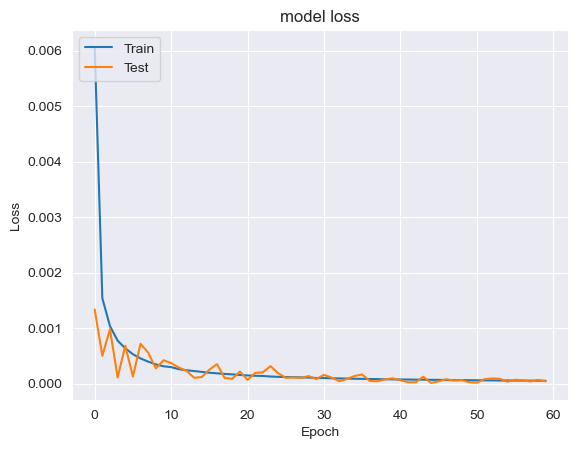

In [64]:
plot_his(history_3)

In [65]:
model_3.evaluate(X_test,Y_test)

6218/6218 [==============================] - 11s 2ms/step - loss: 4.2172e-05 - rmse: 4.7100e-05 - mae: 4.2172e-05 - mse: 2.2184e-09 - mape: 0.0149


[4.217222158331424e-05,
 4.710024950327352e-05,
 4.217222158331424e-05,
 2.2184334369512726e-09,
 0.014871337451040745]

In [66]:
Y_pred_3 = model_3.predict(X_test)

6218/6218 [==============================] - 9s 1ms/step


In [67]:
AIC_value(model_3,Y_pred_3,Y_test)

AIC:  8981.581


# Model 4

In [68]:
%%time
import tensorflow as tf
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([tf.keras.layers.Dense(200),
                               tf.keras.layers.Dense(50),
                               tf.keras.layers.Dense(10,activation = 'relu'),
                               tf.keras.layers.Dense(1)])

model_4.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_4 = model_4.fit(X_train,Y_train, epochs= 100,validation_data=(X_test,Y_test), callbacks = callback)

Epoch 1/100
24872/24872 [==============================] - 67s 3ms/step - loss: 0.0033 - rmse: 0.0202 - mae: 0.0033 - mse: 4.0824e-04 - mape: 10.1003 - val_loss: 0.0012 - val_rmse: 0.0015 - val_mae: 0.0012 - val_mse: 2.2790e-06 - val_mape: 0.7312
Epoch 2/100
24872/24872 [==============================] - 65s 3ms/step - loss: 0.0011 - rmse: 0.0015 - mae: 0.0011 - mse: 2.1159e-06 - mape: 8.6447 - val_loss: 0.0011 - val_rmse: 0.0013 - val_mae: 0.0011 - val_mse: 1.7660e-06 - val_mape: 0.7338
Epoch 3/100
24872/24872 [==============================] - 65s 3ms/step - loss: 5.6079e-04 - rmse: 7.8614e-04 - mae: 5.6079e-04 - mse: 6.1801e-07 - mape: 2.2479 - val_loss: 3.8109e-04 - val_rmse: 4.9280e-04 - val_mae: 3.8109e-04 - val_mse: 2.4285e-07 - val_mape: 0.2342
Epoch 4/100
24872/24872 [==============================] - 65s 3ms/step - loss: 2.2241e-04 - rmse: 3.0558e-04 - mae: 2.2241e-04 - mse: 9.3382e-08 - mape: 0.5340 - val_loss: 1.0962e-04 - val_rmse: 1.5682e-04 - val_mae: 1.0962e-04 - val_ms

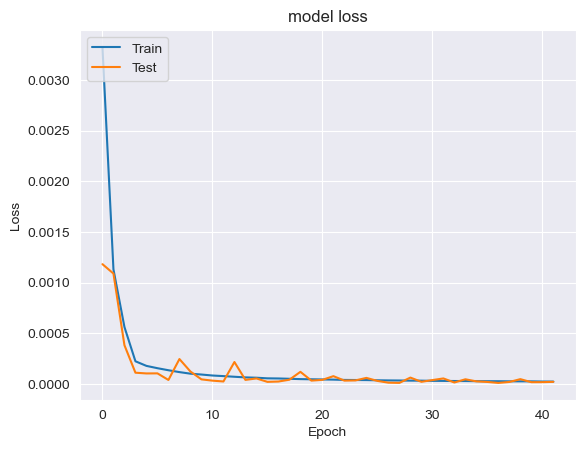

In [69]:
plot_his(history_4)

In [70]:
model_4.evaluate(X_test,Y_test)

6218/6218 [==============================] - 12s 2ms/step - loss: 1.9337e-05 - rmse: 2.4025e-05 - mae: 1.9337e-05 - mse: 5.7718e-10 - mape: 0.0159


[1.9337161575094797e-05,
 2.4024624508456327e-05,
 1.9337161575094797e-05,
 5.771825795086727e-10,
 0.015876207500696182]

In [71]:
Y_pred_4 = model_4.predict(X_test)

6218/6218 [==============================] - 9s 1ms/step


In [72]:
AIC_value(model_4,Y_pred_4,Y_test)

AIC:  23541.58


# LSTM


# Model 5

In [73]:
%%time
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([tf.keras.layers.LSTM(50,activation= 'relu',return_sequences=True, input_shape=(5,1)),
                               tf.keras.layers.LSTM(10,activation='relu'),
                               tf.keras.layers.Dense(1)])

model_5.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_5 = model_5.fit(X_train,Y_train,epochs=50,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/50
24872/24872 [==============================] - 173s 7ms/step - loss: 0.0102 - rmse: 0.0526 - mae: 0.0102 - mse: 0.0028 - mape: 36.4412 - val_loss: 0.0046 - val_rmse: 0.0050 - val_mae: 0.0046 - val_mse: 2.5049e-05 - val_mape: 4.1238
Epoch 2/50
24872/24872 [==============================] - 169s 7ms/step - loss: 0.0024 - rmse: 0.0030 - mae: 0.0024 - mse: 9.2505e-06 - mape: 11.6429 - val_loss: 0.0013 - val_rmse: 0.0017 - val_mae: 0.0013 - val_mse: 2.7469e-06 - val_mape: 0.9163
Epoch 3/50
24872/24872 [==============================] - 170s 7ms/step - loss: 0.0017 - rmse: 0.0022 - mae: 0.0017 - mse: 4.9745e-06 - mape: 4.1206 - val_loss: 0.0027 - val_rmse: 0.0030 - val_mae: 0.0027 - val_mse: 9.2053e-06 - val_mape: 2.0331
Epoch 4/50
24872/24872 [==============================] - 171s 7ms/step - loss: 0.0014 - rmse: 0.0019 - mae: 0.0014 - mse: 3.5161e-06 - mape: 10.2217 - val_loss: 9.2224e-04 - val_rmse: 0.0013 - val_mae: 9.2224e-04 - val_mse: 1.7728e-06 - val_mape: 1.1251
Epoch 5/5

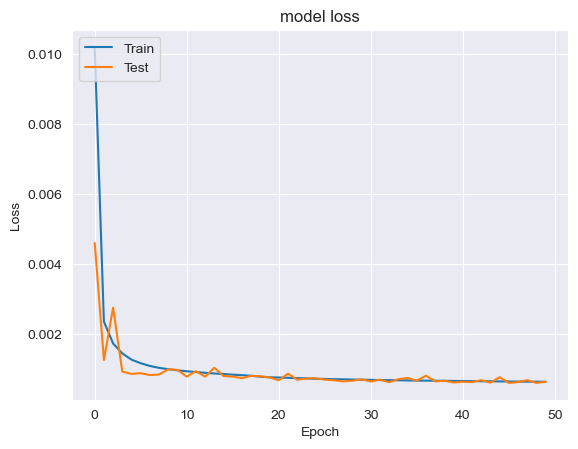

In [74]:
plot_his(history_5)

In [75]:
model_5.evaluate(X_test,Y_test)

6218/6218 [==============================] - 20s 3ms/step - loss: 6.3057e-04 - rmse: 9.1220e-04 - mae: 6.3057e-04 - mse: 8.3211e-07 - mape: 0.7980


[0.000630565860774368,
 0.0009121981565840542,
 0.000630565860774368,
 8.321055133819755e-07,
 0.7980499863624573]

In [76]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 50)             10400     
                                                                 
 lstm_1 (LSTM)               (None, 10)                2440      
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 12,851
Trainable params: 12,851
Non-trainable params: 0
_________________________________________________________________


In [77]:
prediction_5 = model_5.predict(X_test)

6218/6218 [==============================] - 18s 3ms/step


In [78]:
AIC_value(model_5,prediction_5,Y_test)

AIC:  25701.58


In [79]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 50)             10400     
                                                                 
 lstm_1 (LSTM)               (None, 10)                2440      
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 12,851
Trainable params: 12,851
Non-trainable params: 0
_________________________________________________________________


# Model 6

In [80]:
%%time
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([tf.keras.layers.LSTM(70,activation= 'relu',return_sequences=True, input_shape=(5,1)),
                               tf.keras.layers.LSTM(30,activation= 'relu'),
                               tf.keras.layers.Dense(20,activation='relu'),
                               tf.keras.layers.Dense(1,activation='linear')])

model_6.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay = 0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_6 = model_6.fit(X_train,Y_train,epochs=40,validation_data=(X_test,Y_test))

Epoch 1/40
24872/24872 [==============================] - 206s 8ms/step - loss: 0.0111 - rmse: 0.0475 - mae: 0.0111 - mse: 0.0023 - mape: 40.3555 - val_loss: 0.0033 - val_rmse: 0.0047 - val_mae: 0.0033 - val_mse: 2.2094e-05 - val_mape: 2.3165
Epoch 2/40
24872/24872 [==============================] - 198s 8ms/step - loss: 0.0024 - rmse: 0.0033 - mae: 0.0024 - mse: 1.1061e-05 - mape: 10.5108 - val_loss: 0.0011 - val_rmse: 0.0017 - val_mae: 0.0011 - val_mse: 3.0555e-06 - val_mape: 1.1053
Epoch 3/40
24872/24872 [==============================] - 197s 8ms/step - loss: 0.0016 - rmse: 0.0023 - mae: 0.0016 - mse: 5.1814e-06 - mape: 5.8814 - val_loss: 8.9171e-04 - val_rmse: 0.0015 - val_mae: 8.9171e-04 - val_mse: 2.3385e-06 - val_mape: 0.9179
Epoch 4/40
24872/24872 [==============================] - 197s 8ms/step - loss: 0.0013 - rmse: 0.0019 - mae: 0.0013 - mse: 3.6106e-06 - mape: 10.3135 - val_loss: 0.0013 - val_rmse: 0.0017 - val_mae: 0.0013 - val_mse: 3.0326e-06 - val_mape: 1.3556
Epoch 5/4

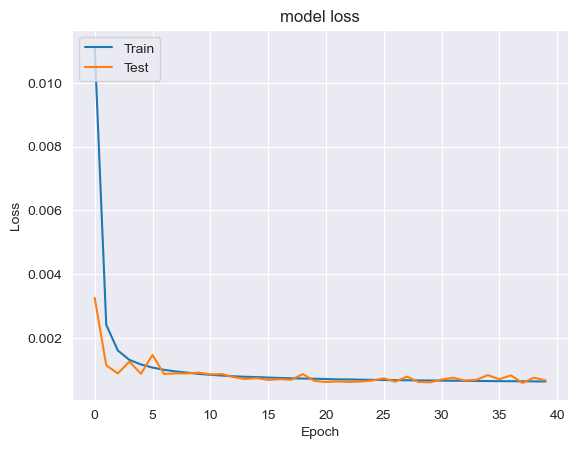

In [81]:
plot_his(history_6)

In [82]:
model_6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 5, 70)             20160     
                                                                 
 lstm_3 (LSTM)               (None, 30)                12120     
                                                                 
 dense_16 (Dense)            (None, 20)                620       
                                                                 
 dense_17 (Dense)            (None, 1)                 21        
                                                                 
Total params: 32,921
Trainable params: 32,921
Non-trainable params: 0
_________________________________________________________________


In [83]:
model_6.evaluate(X_test,Y_test)

6218/6218 [==============================] - 23s 4ms/step - loss: 6.7188e-04 - rmse: 0.0010 - mae: 6.7188e-04 - mse: 1.0584e-06 - mape: 0.8927


[0.000671881134621799,
 0.0010287626646459103,
 0.000671881134621799,
 1.0583526091068052e-06,
 0.8926657438278198]

In [84]:
prediction_6 = model_6.predict(X_test)

6218/6218 [==============================] - 21s 3ms/step


In [85]:
AIC_value(model_6,prediction_6,Y_test)

AIC:  65841.58


In [86]:
model_6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 5, 70)             20160     
                                                                 
 lstm_3 (LSTM)               (None, 30)                12120     
                                                                 
 dense_16 (Dense)            (None, 20)                620       
                                                                 
 dense_17 (Dense)            (None, 1)                 21        
                                                                 
Total params: 32,921
Trainable params: 32,921
Non-trainable params: 0
_________________________________________________________________


# Model 7

In [87]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([tf.keras.layers.LSTM(30,activation= 'linear',return_sequences=True, input_shape=(5,1)),
                               tf.keras.layers.LSTM(10,activation='relu'),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)])

model_7.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_7 = model_7.fit(X_train,Y_train,batch_size = 128,epochs=70,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/70
6218/6218 [==============================] - 51s 7ms/step - loss: 0.0265 - rmse: 0.0985 - mae: 0.0265 - mse: 0.0097 - mape: 53.7997 - val_loss: 0.0122 - val_rmse: 0.0137 - val_mae: 0.0122 - val_mse: 1.8811e-04 - val_mape: 6.6767
Epoch 2/70
6218/6218 [==============================] - 46s 7ms/step - loss: 0.0059 - rmse: 0.0079 - mae: 0.0059 - mse: 6.3062e-05 - mape: 34.4412 - val_loss: 0.0072 - val_rmse: 0.0083 - val_mae: 0.0072 - val_mse: 6.9315e-05 - val_mape: 4.4161
Epoch 3/70
6218/6218 [==============================] - 46s 7ms/step - loss: 0.0042 - rmse: 0.0057 - mae: 0.0042 - mse: 3.2348e-05 - mape: 26.6572 - val_loss: 0.0027 - val_rmse: 0.0039 - val_mae: 0.0027 - val_mse: 1.5415e-05 - val_mape: 2.4574
Epoch 4/70
6218/6218 [==============================] - 46s 7ms/step - loss: 0.0033 - rmse: 0.0044 - mae: 0.0033 - mse: 1.9277e-05 - mape: 12.8726 - val_loss: 0.0025 - val_rmse: 0.0033 - val_mae: 0.0025 - val_mse: 1.0779e-05 - val_mape: 2.1633
Epoch 5/70
6218/6218 [======

6218/6218 [==============================] - 45s 7ms/step - loss: 7.6248e-04 - rmse: 0.0010 - mae: 7.6248e-04 - mse: 1.0415e-06 - mape: 7.1401 - val_loss: 7.6350e-04 - val_rmse: 0.0010 - val_mae: 7.6350e-04 - val_mse: 1.0483e-06 - val_mape: 0.6342
Epoch 66/70
6218/6218 [==============================] - 45s 7ms/step - loss: 7.5721e-04 - rmse: 0.0010 - mae: 7.5721e-04 - mse: 1.0286e-06 - mape: 6.8107 - val_loss: 7.5080e-04 - val_rmse: 9.7703e-04 - val_mae: 7.5080e-04 - val_mse: 9.5458e-07 - val_mape: 0.6366
Epoch 67/70
6218/6218 [==============================] - 45s 7ms/step - loss: 7.5063e-04 - rmse: 0.0010 - mae: 7.5063e-04 - mse: 1.0129e-06 - mape: 7.3731 - val_loss: 7.8406e-04 - val_rmse: 0.0011 - val_mae: 7.8406e-04 - val_mse: 1.1206e-06 - val_mape: 0.7859
Epoch 68/70
6218/6218 [==============================] - 45s 7ms/step - loss: 7.4433e-04 - rmse: 9.9726e-04 - mae: 7.4433e-04 - mse: 9.9453e-07 - mape: 8.2959 - val_loss: 7.3871e-04 - val_rmse: 9.7490e-04 - val_mae: 7.3871e-04 -

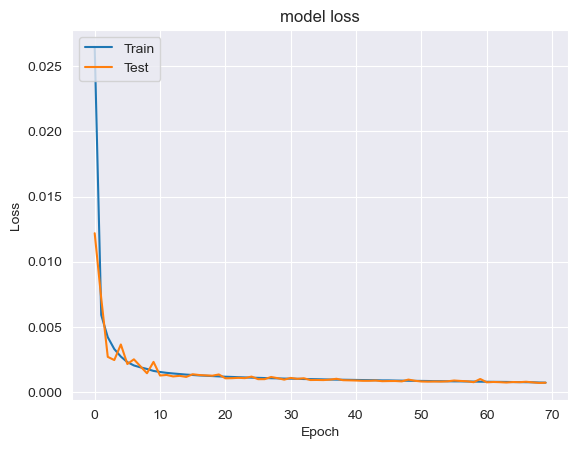

In [88]:
plot_his(history_7)

In [89]:
prediction_7 = model_7.predict(X_test)

6218/6218 [==============================] - 16s 3ms/step


In [90]:
model_7.evaluate(X_test,Y_test)

6218/6218 [==============================] - 19s 3ms/step - loss: 7.1124e-04 - rmse: 9.7848e-04 - mae: 7.1124e-04 - mse: 9.5743e-07 - mape: 0.7137


[0.0007112388266250491,
 0.0009784845169633627,
 0.0007112388266250491,
 9.574318937666249e-07,
 0.713721513748169]

In [91]:
AIC_value(model_7,prediction_7,Y_test)

AIC:  11201.58


In [92]:
model_7.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 5, 30)             3840      
                                                                 
 lstm_5 (LSTM)               (None, 10)                1640      
                                                                 
 dense_18 (Dense)            (None, 10)                110       
                                                                 
 dense_19 (Dense)            (None, 1)                 11        
                                                                 
Total params: 5,601
Trainable params: 5,601
Non-trainable params: 0
_________________________________________________________________


In [93]:
# Y_test = np.asarray(Y_test).astype('float32').reshape((-1,1))
# prediction_7 = np.asarray(prediction_7).astype('float32').reshape((-1,1))


# # Calculate the negative log-likelihood of the model's parameters based on the training data
# nll = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=Y_test, logits=prediction_7[:198976]))

# # Calculate the number of parameters in the model
# num_params = model_7.count_params()

# # Calculate the AIC value for the model
# aic = 2 * num_params - 2 * nll

# # Print the AIC value
# print("AIC: ", aic.numpy())

In [94]:
# AIC_value(model_7,prediction_7[:198976],Y_test)  # becaus logitis are geetting shape error

# Model 8

In [45]:
%%time
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([tf.keras.layers.LSTM(70,activation= 'relu',return_sequences=True, input_shape=(5,1)),
                               tf.keras.layers.LSTM(30,activation= 'relu'),
                               tf.keras.layers.Dense(20,activation='relu'),
                               tf.keras.layers.Dense(1,activation='linear')])

model_8.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay = 0.001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_8 = model_8.fit(X_train,Y_train,batch_size=64,epochs=40,validation_data=(X_test,Y_test))

Epoch 1/40
12436/12436 [==============================] - 94s 7ms/step - loss: 0.0140 - rmse: 0.0628 - mae: 0.0140 - mse: 0.0039 - mape: 60.5345 - val_loss: 0.0063 - val_rmse: 0.0082 - val_mae: 0.0063 - val_mse: 6.6919e-05 - val_mape: 3.5658
Epoch 2/40
12436/12436 [==============================] - 96s 8ms/step - loss: 0.0029 - rmse: 0.0055 - mae: 0.0029 - mse: 3.0351e-05 - mape: 36.7188 - val_loss: 0.0024 - val_rmse: 0.0049 - val_mae: 0.0024 - val_mse: 2.4220e-05 - val_mape: 1.7856
Epoch 3/40
12436/12436 [==============================] - 96s 8ms/step - loss: 0.0024 - rmse: 0.0047 - mae: 0.0024 - mse: 2.2448e-05 - mape: 35.1457 - val_loss: 0.0023 - val_rmse: 0.0045 - val_mae: 0.0023 - val_mse: 2.0458e-05 - val_mape: 1.8307
Epoch 4/40
12436/12436 [==============================] - 96s 8ms/step - loss: 0.0022 - rmse: 0.0043 - mae: 0.0022 - mse: 1.8639e-05 - mape: 38.7323 - val_loss: 0.0021 - val_rmse: 0.0041 - val_mae: 0.0021 - val_mse: 1.6856e-05 - val_mape: 1.7249
Epoch 5/40
12436/124

12436/12436 [==============================] - 99s 8ms/step - loss: 0.0014 - rmse: 0.0026 - mae: 0.0014 - mse: 6.5589e-06 - mape: 30.9934 - val_loss: 0.0014 - val_rmse: 0.0025 - val_mae: 0.0014 - val_mse: 6.4311e-06 - val_mape: 1.5597
Epoch 35/40
12436/12436 [==============================] - 96s 8ms/step - loss: 0.0014 - rmse: 0.0025 - mae: 0.0014 - mse: 6.4932e-06 - mape: 30.2802 - val_loss: 0.0014 - val_rmse: 0.0025 - val_mae: 0.0014 - val_mse: 6.3601e-06 - val_mape: 1.5535
Epoch 36/40
12436/12436 [==============================] - 98s 8ms/step - loss: 0.0014 - rmse: 0.0025 - mae: 0.0014 - mse: 6.4303e-06 - mape: 31.3342 - val_loss: 0.0014 - val_rmse: 0.0025 - val_mae: 0.0014 - val_mse: 6.4006e-06 - val_mape: 1.5517
Epoch 37/40
12436/12436 [==============================] - 91s 7ms/step - loss: 0.0014 - rmse: 0.0025 - mae: 0.0014 - mse: 6.3663e-06 - mape: 30.2646 - val_loss: 0.0014 - val_rmse: 0.0025 - val_mae: 0.0014 - val_mse: 6.2285e-06 - val_mape: 1.5492
Epoch 38/40
12436/12436 

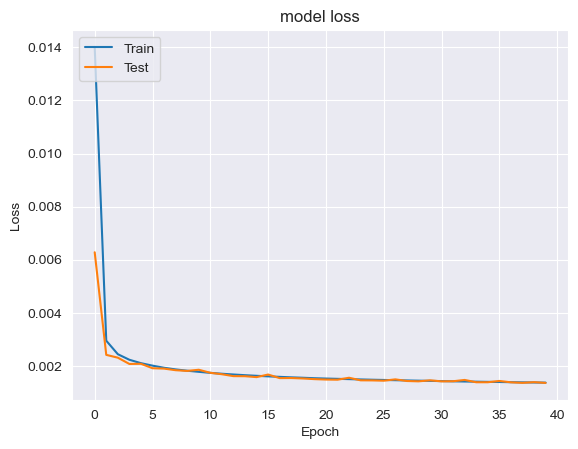

In [46]:
plot_his(history_8)

In [47]:
prediction_8 = model_8.predict(X_test)

6218/6218 [==============================] - 13s 2ms/step


In [48]:
model_8.evaluate(X_test,Y_test)

6218/6218 [==============================] - 17s 3ms/step - loss: 0.0014 - rmse: 0.0025 - mae: 0.0014 - mse: 6.0165e-06 - mape: 1.5440


[0.0013585013803094625,
 0.0024528484791517258,
 0.0013585013803094625,
 6.01646615905338e-06,
 1.544013261795044]

In [49]:
AIC_value(model_8,prediction_8, Y_test)

AIC:  65841.586


# CNN

# Model 9

In [50]:
%%time
model_9 = tf.keras.Sequential([tf.keras.layers.Conv1D(10,3,activation='linear',input_shape=(5,1)),
                               tf.keras.layers.Conv1D(10,3,activation='relu'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(1)])

model_9.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_9 = model_9.fit(X_train,Y_train,epochs=50,validation_data=(X_test,Y_test),callbacks=callback)

Epoch 1/50
24872/24872 [==============================] - 51s 2ms/step - loss: 0.0040 - rmse: 0.0365 - mae: 0.0040 - mse: 0.0013 - mape: 6.5467 - val_loss: 7.3856e-04 - val_rmse: 8.9705e-04 - val_mae: 7.3856e-04 - val_mse: 8.0470e-07 - val_mape: 0.3659
Epoch 2/50
24872/24872 [==============================] - 45s 2ms/step - loss: 7.5569e-04 - rmse: 9.4903e-04 - mae: 7.5569e-04 - mse: 9.0066e-07 - mape: 3.4806 - val_loss: 5.4189e-04 - val_rmse: 6.7267e-04 - val_mae: 5.4189e-04 - val_mse: 4.5249e-07 - val_mape: 0.2651
Epoch 3/50
24872/24872 [==============================] - 44s 2ms/step - loss: 5.0688e-04 - rmse: 6.3619e-04 - mae: 5.0688e-04 - mse: 4.0474e-07 - mape: 1.7457 - val_loss: 4.4948e-04 - val_rmse: 5.5021e-04 - val_mae: 4.4948e-04 - val_mse: 3.0273e-07 - val_mape: 0.3084
Epoch 4/50
24872/24872 [==============================] - 44s 2ms/step - loss: 3.4604e-04 - rmse: 4.3751e-04 - mae: 3.4604e-04 - mse: 1.9142e-07 - mape: 2.3486 - val_loss: 2.2318e-04 - val_rmse: 2.7850e-04 - v

24872/24872 [==============================] - 41s 2ms/step - loss: 4.5513e-05 - rmse: 5.9783e-05 - mae: 4.5513e-05 - mse: 3.5740e-09 - mape: 0.2210 - val_loss: 2.6769e-05 - val_rmse: 3.0903e-05 - val_mae: 2.6769e-05 - val_mse: 9.5499e-10 - val_mape: 0.0142
Epoch 32/50
24872/24872 [==============================] - 42s 2ms/step - loss: 4.4641e-05 - rmse: 5.8844e-05 - mae: 4.4641e-05 - mse: 3.4627e-09 - mape: 0.1188 - val_loss: 1.4772e-05 - val_rmse: 1.9388e-05 - val_mae: 1.4772e-05 - val_mse: 3.7591e-10 - val_mape: 0.0041
Epoch 33/50
24872/24872 [==============================] - 46s 2ms/step - loss: 4.4610e-05 - rmse: 5.8504e-05 - mae: 4.4610e-05 - mse: 3.4228e-09 - mape: 0.1535 - val_loss: 5.3036e-05 - val_rmse: 5.8647e-05 - val_mae: 5.3036e-05 - val_mse: 3.4394e-09 - val_mape: 0.0135
Epoch 33: early stopping
CPU times: total: 36min 9s
Wall time: 24min 21s


In [51]:
model_9.evaluate(X_test,Y_test)

6218/6218 [==============================] - 7s 1ms/step - loss: 5.3036e-05 - rmse: 5.8647e-05 - mae: 5.3036e-05 - mse: 3.4394e-09 - mape: 0.0135


[5.303639773046598e-05,
 5.864665217814036e-05,
 5.303639773046598e-05,
 3.439429852036824e-09,
 0.013522034510970116]

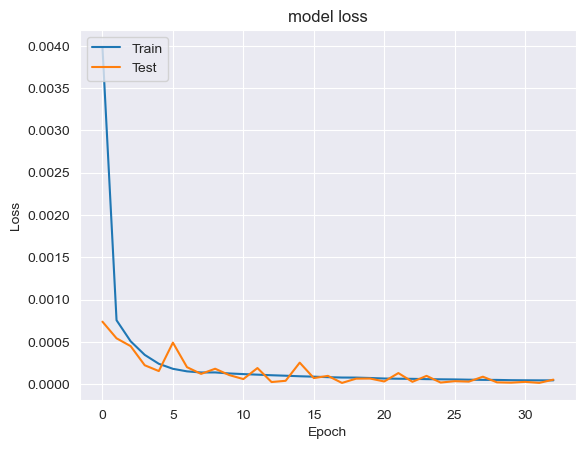

In [52]:
plot_his(history_9)

In [53]:
prediction_9 = model_9.predict(X_test)

6218/6218 [==============================] - 5s 861us/step


In [54]:
AIC_value(model_9,prediction_9,Y_test)

AIC:  721.5865


# Model 10

In [55]:
%%time
model_10 = tf.keras.Sequential([tf.keras.layers.Conv1D(10,2,activation='linear',input_shape=(5,1)),
                               tf.keras.layers.Conv1D(10,3,activation='linear'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(20),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1,activation='linear')])

model_10.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_10 = model_10.fit(X_train,Y_train,epochs=100,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/100
24872/24872 [==============================] - 46s 2ms/step - loss: 0.0048 - rmse: 0.0279 - mae: 0.0048 - mse: 7.7762e-04 - mape: 7.2458 - val_loss: 8.9121e-04 - val_rmse: 9.6998e-04 - val_mae: 8.9121e-04 - val_mse: 9.4086e-07 - val_mape: 0.4333
Epoch 2/100
24872/24872 [==============================] - 45s 2ms/step - loss: 0.0015 - rmse: 0.0019 - mae: 0.0015 - mse: 3.7964e-06 - mape: 4.1966 - val_loss: 0.0024 - val_rmse: 0.0025 - val_mae: 0.0024 - val_mse: 6.2167e-06 - val_mape: 1.2525
Epoch 3/100
24872/24872 [==============================] - 46s 2ms/step - loss: 9.2452e-04 - rmse: 0.0012 - mae: 9.2452e-04 - mse: 1.5219e-06 - mape: 1.3367 - val_loss: 0.0010 - val_rmse: 0.0012 - val_mae: 0.0010 - val_mse: 1.3807e-06 - val_mape: 0.4629
Epoch 4/100
24872/24872 [==============================] - 45s 2ms/step - loss: 6.8286e-04 - rmse: 9.0715e-04 - mae: 6.8286e-04 - mse: 8.2292e-07 - mape: 1.3402 - val_loss: 3.2494e-04 - val_rmse: 3.5231e-04 - val_mae: 3.2494e-04 - val_mse: 1.

24872/24872 [==============================] - 43s 2ms/step - loss: 8.3388e-05 - rmse: 1.1089e-04 - mae: 8.3388e-05 - mse: 1.2297e-08 - mape: 0.2456 - val_loss: 6.7528e-05 - val_rmse: 7.2132e-05 - val_mae: 6.7528e-05 - val_mse: 5.2031e-09 - val_mape: 0.0345
Epoch 32/100
24872/24872 [==============================] - 43s 2ms/step - loss: 8.1985e-05 - rmse: 1.0940e-04 - mae: 8.1985e-05 - mse: 1.1968e-08 - mape: 0.4647 - val_loss: 5.3270e-05 - val_rmse: 5.7604e-05 - val_mae: 5.3270e-05 - val_mse: 3.3182e-09 - val_mape: 0.0293
Epoch 33/100
24872/24872 [==============================] - 43s 2ms/step - loss: 7.8997e-05 - rmse: 1.0447e-04 - mae: 7.8997e-05 - mse: 1.0914e-08 - mape: 0.2901 - val_loss: 4.4151e-05 - val_rmse: 5.1927e-05 - val_mae: 4.4151e-05 - val_mse: 2.6964e-09 - val_mape: 0.0206
Epoch 34/100
24872/24872 [==============================] - 43s 2ms/step - loss: 7.6485e-05 - rmse: 1.0184e-04 - mae: 7.6485e-05 - mse: 1.0370e-08 - mape: 0.1732 - val_loss: 4.3836e-05 - val_rmse: 5.1

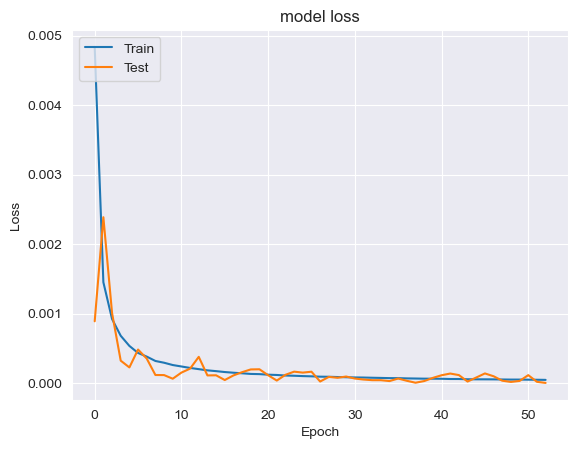

In [56]:
plot_his(history_10)

In [57]:
model_10.evaluate(X_test,Y_test)

6218/6218 [==============================] - 7s 1ms/step - loss: 4.5562e-06 - rmse: 4.8863e-06 - mae: 4.5562e-06 - mse: 2.3876e-11 - mape: 0.0026


[4.556182375381468e-06,
 4.8862580115383025e-06,
 4.556182375381468e-06,
 2.3875517882188113e-11,
 0.002590843243524432]

In [58]:
prediction_10 = model_10.predict(X_test)

6218/6218 [==============================] - 5s 861us/step


In [59]:
AIC_value(model_10,prediction_10,Y_test)

AIC:  1961.5865


# Model 11

In [60]:
%%time
model_11 = tf.keras.Sequential([tf.keras.layers.Conv1D(32,3,activation='linear',input_shape=(5,1)),
                               tf.keras.layers.Conv1D(32,2,activation='linear'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(32,activation="linear"),
                               tf.keras.layers.Dense(16,activation="relu"),
                               tf.keras.layers.Dense(1,activation ='linear')])

model_11.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001,decay=0.001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_11 = model_11.fit(X_train,Y_train,epochs=100,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/100
24872/24872 [==============================] - 46s 2ms/step - loss: 0.0087 - rmse: 0.0612 - mae: 0.0087 - mse: 0.0037 - mape: 12.4207 - val_loss: 0.0011 - val_rmse: 0.0022 - val_mae: 0.0011 - val_mse: 4.7777e-06 - val_mape: 0.5435
Epoch 2/100
24872/24872 [==============================] - 45s 2ms/step - loss: 0.0010 - rmse: 0.0018 - mae: 0.0010 - mse: 3.1703e-06 - mape: 4.2780 - val_loss: 9.3898e-04 - val_rmse: 0.0015 - val_mae: 9.3898e-04 - val_mse: 2.2691e-06 - val_mape: 0.5632
Epoch 3/100
24872/24872 [==============================] - 45s 2ms/step - loss: 9.2454e-04 - rmse: 0.0014 - mae: 9.2454e-04 - mse: 1.9513e-06 - mape: 3.2237 - val_loss: 9.2706e-04 - val_rmse: 0.0013 - val_mae: 9.2706e-04 - val_mse: 1.8107e-06 - val_mape: 0.6309
Epoch 4/100
24872/24872 [==============================] - 45s 2ms/step - loss: 8.8135e-04 - rmse: 0.0012 - mae: 8.8135e-04 - mse: 1.5419e-06 - mape: 3.9418 - val_loss: 8.5379e-04 - val_rmse: 0.0012 - val_mae: 8.5379e-04 - val_mse: 1.3836e-0

Epoch 32/100
24872/24872 [==============================] - 43s 2ms/step - loss: 6.5725e-04 - rmse: 8.1630e-04 - mae: 6.5725e-04 - mse: 6.6635e-07 - mape: 2.7888 - val_loss: 6.5401e-04 - val_rmse: 8.0749e-04 - val_mae: 6.5401e-04 - val_mse: 6.5204e-07 - val_mape: 0.4240
Epoch 33/100
24872/24872 [==============================] - 43s 2ms/step - loss: 6.5423e-04 - rmse: 8.1218e-04 - mae: 6.5423e-04 - mse: 6.5964e-07 - mape: 2.7696 - val_loss: 6.5107e-04 - val_rmse: 8.0330e-04 - val_mae: 6.5107e-04 - val_mse: 6.4529e-07 - val_mape: 0.4186
Epoch 34/100
24872/24872 [==============================] - 44s 2ms/step - loss: 6.5138e-04 - rmse: 8.0847e-04 - mae: 6.5138e-04 - mse: 6.5362e-07 - mape: 2.6320 - val_loss: 6.4905e-04 - val_rmse: 7.9875e-04 - val_mae: 6.4905e-04 - val_mse: 6.3800e-07 - val_mape: 0.4132
Epoch 35/100
24872/24872 [==============================] - 43s 2ms/step - loss: 6.4863e-04 - rmse: 8.0473e-04 - mae: 6.4863e-04 - mse: 6.4759e-07 - mape: 2.5131 - val_loss: 6.4548e-04 - 

24872/24872 [==============================] - 44s 2ms/step - loss: 5.9420e-04 - rmse: 7.3389e-04 - mae: 5.9420e-04 - mse: 5.3859e-07 - mape: 2.5424 - val_loss: 5.9243e-04 - val_rmse: 7.2862e-04 - val_mae: 5.9243e-04 - val_mse: 5.3089e-07 - val_mape: 0.3846
Epoch 63/100
24872/24872 [==============================] - 43s 2ms/step - loss: 5.9266e-04 - rmse: 7.3196e-04 - mae: 5.9266e-04 - mse: 5.3577e-07 - mape: 2.5814 - val_loss: 5.9094e-04 - val_rmse: 7.2584e-04 - val_mae: 5.9094e-04 - val_mse: 5.2684e-07 - val_mape: 0.3834
Epoch 64/100
24872/24872 [==============================] - 43s 2ms/step - loss: 5.9127e-04 - rmse: 7.3013e-04 - mae: 5.9127e-04 - mse: 5.3310e-07 - mape: 2.5221 - val_loss: 5.8963e-04 - val_rmse: 7.2453e-04 - val_mae: 5.8963e-04 - val_mse: 5.2494e-07 - val_mape: 0.3840
Epoch 65/100
24872/24872 [==============================] - 43s 2ms/step - loss: 5.8983e-04 - rmse: 7.2829e-04 - mae: 5.8983e-04 - mse: 5.3041e-07 - mape: 2.5163 - val_loss: 5.8818e-04 - val_rmse: 7.2

24872/24872 [==============================] - 46s 2ms/step - loss: 5.5726e-04 - rmse: 6.8714e-04 - mae: 5.5726e-04 - mse: 4.7215e-07 - mape: 2.4433 - val_loss: 5.5635e-04 - val_rmse: 6.8191e-04 - val_mae: 5.5635e-04 - val_mse: 4.6500e-07 - val_mape: 0.3585
Epoch 93/100
24872/24872 [==============================] - 51s 2ms/step - loss: 5.5624e-04 - rmse: 6.8585e-04 - mae: 5.5624e-04 - mse: 4.7039e-07 - mape: 2.4496 - val_loss: 5.5498e-04 - val_rmse: 6.8096e-04 - val_mae: 5.5498e-04 - val_mse: 4.6371e-07 - val_mape: 0.3588
Epoch 94/100
24872/24872 [==============================] - 48s 2ms/step - loss: 5.5531e-04 - rmse: 6.8471e-04 - mae: 5.5531e-04 - mse: 4.6882e-07 - mape: 2.4440 - val_loss: 5.5432e-04 - val_rmse: 6.8155e-04 - val_mae: 5.5432e-04 - val_mse: 4.6451e-07 - val_mape: 0.3626
Epoch 95/100
24872/24872 [==============================] - 49s 2ms/step - loss: 5.5431e-04 - rmse: 6.8342e-04 - mae: 5.5431e-04 - mse: 4.6706e-07 - mape: 2.3708 - val_loss: 5.5350e-04 - val_rmse: 6.7

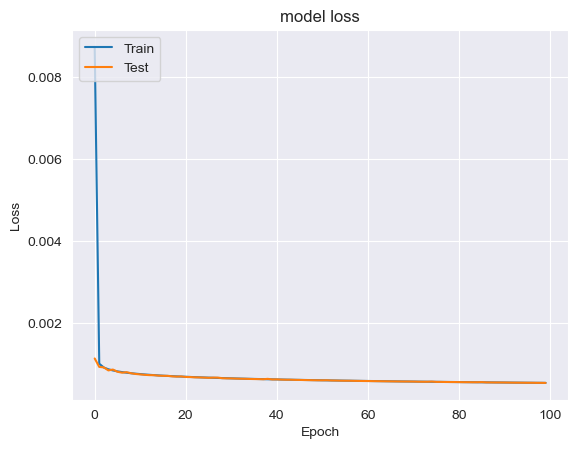

In [61]:
plot_his(history_11)

In [62]:
model_11.evaluate(X_test,Y_test)

6218/6218 [==============================] - 8s 1ms/step - loss: 5.4843e-04 - rmse: 6.7212e-04 - mae: 5.4843e-04 - mse: 4.5174e-07 - mape: 0.3546


[0.000548427808098495,
 0.0006721176905557513,
 0.000548427808098495,
 4.517422098615498e-07,
 0.35462862253189087]

In [63]:
prediction_11 = model_11.predict(X_test)

6218/6218 [==============================] - 8s 1ms/step


In [64]:
AIC_value(model_11,prediction_11,Y_test)

AIC:  9665.587


# Model 12

In [65]:
%%time
model_12 = tf.keras.Sequential([tf.keras.layers.Conv1D(32,3,activation='linear',input_shape=(5,1)),
                               tf.keras.layers.Conv1D(8,2,activation='linear'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(5),
                               tf.keras.layers.Dense(1,activation = 'linear')])

model_12.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_12 = model_12.fit(X_train,Y_train,epochs=100,validation_data=(X_test,Y_test))

Epoch 1/100
24872/24872 [==============================] - 51s 2ms/step - loss: 0.0040 - rmse: 0.0224 - mae: 0.0040 - mse: 5.0397e-04 - mape: 8.2728 - val_loss: 0.0013 - val_rmse: 0.0015 - val_mae: 0.0013 - val_mse: 2.2254e-06 - val_mape: 0.6945
Epoch 2/100
24872/24872 [==============================] - 52s 2ms/step - loss: 0.0011 - rmse: 0.0015 - mae: 0.0011 - mse: 2.1057e-06 - mape: 1.6907 - val_loss: 7.5547e-04 - val_rmse: 8.8946e-04 - val_mae: 7.5547e-04 - val_mse: 7.9113e-07 - val_mape: 0.3641
Epoch 3/100
24872/24872 [==============================] - 49s 2ms/step - loss: 7.0839e-04 - rmse: 9.1971e-04 - mae: 7.0839e-04 - mse: 8.4587e-07 - mape: 1.9970 - val_loss: 4.9655e-04 - val_rmse: 5.6388e-04 - val_mae: 4.9655e-04 - val_mse: 3.1796e-07 - val_mape: 0.3397
Epoch 4/100
24872/24872 [==============================] - 49s 2ms/step - loss: 5.2785e-04 - rmse: 6.7891e-04 - mae: 5.2785e-04 - mse: 4.6091e-07 - mape: 1.6015 - val_loss: 1.8322e-04 - val_rmse: 2.0931e-04 - val_mae: 1.8322e-

24872/24872 [==============================] - 48s 2ms/step - loss: 6.2335e-05 - rmse: 8.0472e-05 - mae: 6.2335e-05 - mse: 6.4757e-09 - mape: 0.1534 - val_loss: 8.6961e-05 - val_rmse: 8.7369e-05 - val_mae: 8.6961e-05 - val_mse: 7.6334e-09 - val_mape: 0.0468
Epoch 32/100
24872/24872 [==============================] - 46s 2ms/step - loss: 6.0514e-05 - rmse: 7.7815e-05 - mae: 6.0514e-05 - mse: 6.0552e-09 - mape: 0.1442 - val_loss: 1.4845e-04 - val_rmse: 1.5348e-04 - val_mae: 1.4845e-04 - val_mse: 2.3555e-08 - val_mape: 0.0776
Epoch 33/100
24872/24872 [==============================] - 46s 2ms/step - loss: 5.8758e-05 - rmse: 7.6034e-05 - mae: 5.8758e-05 - mse: 5.7812e-09 - mape: 0.1371 - val_loss: 4.0957e-05 - val_rmse: 4.7514e-05 - val_mae: 4.0957e-05 - val_mse: 2.2575e-09 - val_mape: 0.0189
Epoch 34/100
24872/24872 [==============================] - 45s 2ms/step - loss: 5.7215e-05 - rmse: 7.3455e-05 - mae: 5.7215e-05 - mse: 5.3956e-09 - mape: 0.1892 - val_loss: 1.2710e-05 - val_rmse: 1.5

24872/24872 [==============================] - 50s 2ms/step - loss: 3.1109e-05 - rmse: 4.0082e-05 - mae: 3.1109e-05 - mse: 1.6065e-09 - mape: 0.1730 - val_loss: 3.9012e-05 - val_rmse: 4.3152e-05 - val_mae: 3.9012e-05 - val_mse: 1.8621e-09 - val_mape: 0.0132
Epoch 62/100
24872/24872 [==============================] - 49s 2ms/step - loss: 3.0735e-05 - rmse: 3.9615e-05 - mae: 3.0735e-05 - mse: 1.5693e-09 - mape: 0.0923 - val_loss: 4.5791e-06 - val_rmse: 4.9655e-06 - val_mae: 4.5791e-06 - val_mse: 2.4656e-11 - val_mape: 0.0034
Epoch 63/100
24872/24872 [==============================] - 50s 2ms/step - loss: 3.0652e-05 - rmse: 3.9413e-05 - mae: 3.0652e-05 - mse: 1.5534e-09 - mape: 0.0466 - val_loss: 5.0992e-05 - val_rmse: 5.4353e-05 - val_mae: 5.0992e-05 - val_mse: 2.9542e-09 - val_mape: 0.0264
Epoch 64/100
24872/24872 [==============================] - 49s 2ms/step - loss: 3.0570e-05 - rmse: 3.9387e-05 - mae: 3.0570e-05 - mse: 1.5513e-09 - mape: 0.1766 - val_loss: 2.9631e-05 - val_rmse: 3.1

24872/24872 [==============================] - 46s 2ms/step - loss: 2.1494e-05 - rmse: 2.7628e-05 - mae: 2.1494e-05 - mse: 7.6332e-10 - mape: 0.0810 - val_loss: 1.1657e-05 - val_rmse: 1.5212e-05 - val_mae: 1.1657e-05 - val_mse: 2.3142e-10 - val_mape: 0.0070
Epoch 92/100
24872/24872 [==============================] - 46s 2ms/step - loss: 2.1357e-05 - rmse: 2.7372e-05 - mae: 2.1357e-05 - mse: 7.4925e-10 - mape: 0.0871 - val_loss: 4.2154e-05 - val_rmse: 4.5030e-05 - val_mae: 4.2154e-05 - val_mse: 2.0277e-09 - val_mape: 0.0215
Epoch 93/100
24872/24872 [==============================] - 45s 2ms/step - loss: 2.0452e-05 - rmse: 2.6305e-05 - mae: 2.0452e-05 - mse: 6.9195e-10 - mape: 0.0462 - val_loss: 2.1039e-05 - val_rmse: 2.2574e-05 - val_mae: 2.1039e-05 - val_mse: 5.0957e-10 - val_mape: 0.0140
Epoch 94/100
24872/24872 [==============================] - 43s 2ms/step - loss: 2.0853e-05 - rmse: 2.6801e-05 - mae: 2.0853e-05 - mse: 7.1827e-10 - mape: 0.1208 - val_loss: 4.3181e-05 - val_rmse: 4.5

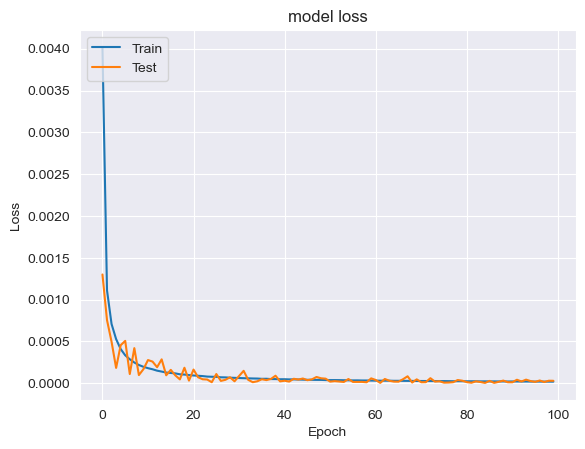

In [66]:
plot_his(history_12)

In [67]:
model_12.evaluate(X_test,Y_test)

6218/6218 [==============================] - 7s 1ms/step - loss: 2.9364e-05 - rmse: 2.9752e-05 - mae: 2.9364e-05 - mse: 8.8517e-10 - mape: 0.0157


[2.9363989597186446e-05,
 2.975185816467274e-05,
 2.9363989597186446e-05,
 8.851730459724649e-10,
 0.015685345977544785]

In [68]:
prediction_12 = model_12.predict(X_test)

6218/6218 [==============================] - 6s 895us/step


In [69]:
AIC_value(model_11,prediction_11,Y_test)

AIC:  9665.587


# Results and Discussions

In [71]:
# AIC_value(model_1,Y_pred_1,Y_test)
# AIC_value(model_2,Y_pred_2,Y_test)
# AIC_value(model_3,Y_pred_3,Y_test)
# AIC_value(model_4,Y_pred_4,Y_test)
# AIC_value(model_5,prediction_5,Y_test)
# AIC_value(model_6,prediction_6,Y_test)
# AIC_value(model_7,prediction_7[:198976],Y_test)
# AIC_value(model_8,prediction_8,Y_test)
# AIC_value(model_9,prediction_9,Y_test)
# AIC_value(model_10,prediction_10,Y_test)
# AIC_value(model_11,prediction_11,Y_test)
# AIC_value(model_12,prediction_12,Y_test)


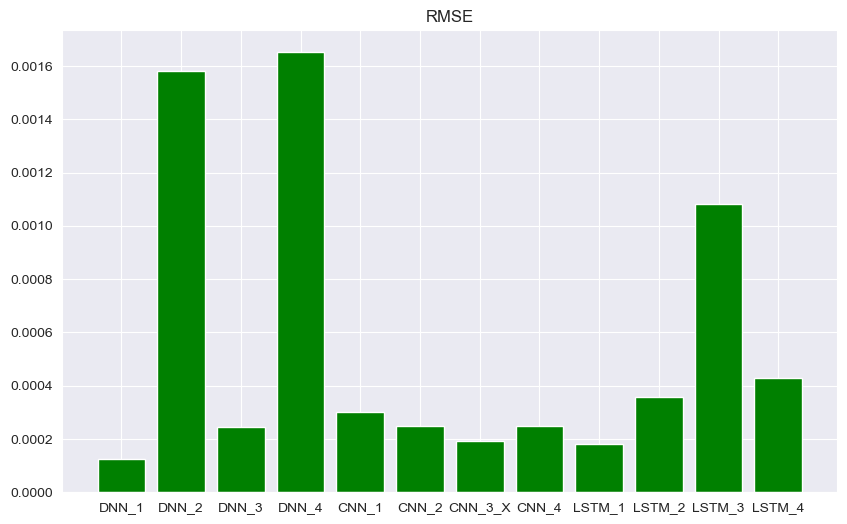

In [72]:
rmse_score = { 'DNN_1':0.000124903,'DNN_2':0.001580797,'DNN_3':0.00024606,'DNN_4':0.00165169,'CNN_1':0.00030274,
              'CNN_2':0.00024752,'CNN_3_X':0.0001937482,'CNN_4':0.00024752,'LSTM_1':0.0001818,
             'LSTM_2':0.000358092, 'LSTM_3':0.00108152, 'LSTM_4':0.000430131 }
names = list(rmse_score.keys())
values = list(rmse_score.values())


plt.figure(figsize=(10,6))
plt.bar(range(len(rmse_score)), values, tick_label=names,color='green')

plt.title('RMSE')
plt.show()

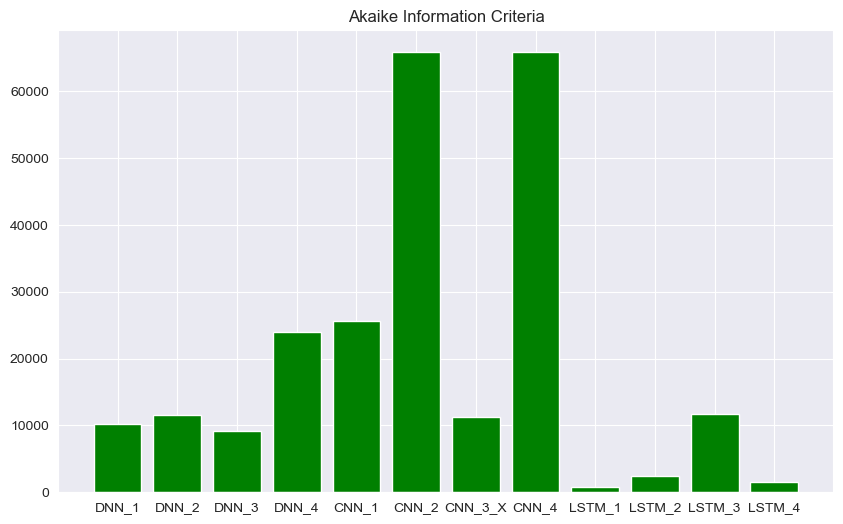

In [73]:
AIC_score = { 'DNN_1':10161.582,'DNN_2':11601.582,'DNN_3':9121.582,'DNN_4':23941.582,'CNN_1':25701.582,
              'CNN_2':65841.58,'CNN_3_X':11200.341,'CNN_4':65841.586,'LSTM_1':741.5822,
             'LSTM_2':2361.582, 'LSTM_3':11713.582, 'LSTM_4':1557.5822 }
names = list(AIC_score.keys())
values = list(AIC_score.values())


plt.figure(figsize=(10,6))
plt.bar(range(len(AIC_score)), values, tick_label=names,color='green')

plt.title('Akaike Information Criteria')
plt.show()

In [74]:
model_1.save('Saved_models/model_1_SOCesti.h5')

In [75]:
model_2.save('Saved_models/model_2_SOCesti.h5')

NameError: name 'model_2' is not defined

In [76]:
model_3.save('Saved_models/model_3_SOCesti.h5')

NameError: name 'model_3' is not defined

In [77]:
model_4.save('Saved_models/model_4_SOCesti.h5')

NameError: name 'model_4' is not defined

In [78]:
model_5.save('Saved_models/model_5_SOCesti.h5')

NameError: name 'model_5' is not defined

In [79]:
model_6.save('Saved_models/model_6_SOCesti.h5')

NameError: name 'model_6' is not defined

In [80]:
model_7.save('Saved_models/model_7_SOCesti.h5')

NameError: name 'model_7' is not defined

In [81]:
model_8.save('Saved_models/model_8_SOCesti.h5')

In [82]:
model_9.save('Saved_models/model_9_SOCesti.h5')

In [83]:
model_10.save('Saved_models/model_10_SOCesti.h5')

In [84]:
model_11.save('Saved_models/model_11_SOCesti.h5')

In [85]:
model_12.save('Saved_models/model_12_SOCesti.h5')

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
plt.plot(Y,color='r')
plt.plot(prediction_7,color='g')
plt.ylabel('SOC')
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('Time')
plt.title('Real Vs Predicted')

In [ ]:
maximum_point = df['Capacity'][ilocs_max].unique()
minimum_point = df['Capacity'][ilocs_min].unique()

In [ ]:
print(maximum_point)
print(maximum_point.max())
print(minimum_point)

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(14, 10))
# plt.plot(minimum_pointum_point,color='orange')
plt.plot(maximum_point,color='green')
plt.ylabel('Capcity')
plt.xlabel('Time')
plt.legend(["Soc", "Integral current"], loc ="upper left")
plt.title('Dataset')

In [ ]:
%%time
from scipy.signal import argrelextrema
import numpy as np

ilocs_min = argrelextrema(Y_pred_4, np.less_equal, order=5000)[0]
ilocs_max = argrelextrema(Y_pred_4, np.greater_equal, order=5000)[0]

df.Capacity.plot(figsize=(20,12), alpha=.3)
# filter prices that are peaks and plot them differently to be visable on the plot
# df.iloc[ilocs_max].Capacity.plot(style='.', lw=1, color='red', marker="v");
# df.iloc[ilocs_min].Capacity.plot(style='.', lw=1, color='green', marker="^")
plt.ylabel("Capacity")
plt.xlabel("Time")
plt.title('Local Maxima and Local Minima')

In [ ]:
maximum_point_pred_soc = ilocs_max
minimum_point_pred_soc = ilocs_min

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(14, 10))
# plt.plot(minimum_pointum_point,color='orange')
plt.plot(maximum_point_pred_soc,color='green')
plt.ylabel('Capcity')
plt.xlabel('Time')
plt.legend(["Soc", "Integral current"], loc ="upper left")
plt.title('Dataset')